# Background

In digital advertising, Click-Through Rate (CTR) is a critical metric that measures the effectiveness of an advertisement. It is calculated as the ratio of users who click on an ad to the number of users who view the ad. A higher CTR indicates more successful engagement with the audience, which can lead to increased conversions and revenue. From time-to-time advertisers experiment with various elements/targeting of an ad to optimise the ROI.

# Scenario

Imagine an innovative digital advertising agency, AdMasters Inc., that specializes in maximizing click-through rates (CTR) for their clients' advertisements. One of their clients has identified four key tunable elements in their ads: *Age*, *City*, *Gender*, and *Mobile Operating System (OS)*. These elements significantly influence user engagement and conversion rates. The client is keen to optimize their CTR while minimizing resource expenditure.

# Objective

Optimize the CTR of digital ads by employing Multi Arm Bandit algorithms. System should dynamically and efficiently allocate ad displays to maximize overall CTR.


# Dataset

The dataset for Ads contains 4 unique features/characteristics.
*   Age (Range: 25:50)
*   City (Possible Values: &#39;New York&#39;, &#39;Los Angeles&#39;, &#39;Chicago&#39;,&#39;Houston&#39;, &#39;Phoenix&#39;)
*   Gender (Possible Values: &#39;Male&#39;, &#39;Female&#39;)
*   OS: (Possible Values: &#39;iOS&#39;, &#39;Android&#39;, &#39;Other&#39;)

***Link for accessing dataset:***
https://drive.google.com/file/d/1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys/view?usp=sharing


# Environment Details

**Arms:** Each arm represents a different ad from the dataset.

**Reward Function:**
* Probability of a Male clicking on an Ad -> 0.7 (randomly generated)
* Probability of a Female clicking on an Ad -> 0.6 (randomly generated)
* Once probabilities are assigned to all the values, create a final reward (clicked or not clicked binary outcome) based on the assumed probabilities in step 1 (by combining the probabilities of each feature value present in that ad)

**Assumptions**
* Assume alpha = beta = 1 for cold start
* Explore Percentage = 10%
* Run the simulation for min 1000 iterations


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [ ]:
# Constants

epsilon = 0.1
n_iterations = 1000

# Initialize value function and policy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


# Load Dataset

In [ ]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------

# Initialize dataset
df = pd.read_csv('AD_Click.csv')

# Dataset statistics
print(df.describe())


              Age
count  780.000000
mean    37.500000
std      7.504812
min     25.000000
25%     31.000000
50%     37.500000
75%     44.000000
max     50.000000


# Design a CTR Environment

In [ ]:
# Code for Dataset loading and print dataset statistics along with reward function

class CTREnvironment:
    def __init__(self, df):
        self.df = df
        self.n_ads = len(df)
        self.reset()

    def reset(self):
        self.total_reward = 0
        self.ads_selected = []

    def get_reward(self, ad_index):
        gender = self.df.iloc[ad_index]['Gender']
        prob = 0.7 if gender == 'Male' else 0.6
        return 1 if np.random.rand() < prob else 0

    def run(self, policy, n_iterations):
        self.reset()
        for _ in range(n_iterations):
            ad_index = policy.select_ad()
            reward = self.get_reward(ad_index)
            policy.update(ad_index, reward)
            self.total_reward += reward
            self.ads_selected.append(ad_index)
        return self.total_reward, self.ads_selected


# Using Random Policy

In [ ]:
#  run the environment with an agent that is guided by a random policy

class RandomPolicy:
    def __init__(self, n_ads):
        self.n_ads = n_ads

    def select_ad(self):
        return np.random.randint(0, self.n_ads)

    def update(self, ad_index, reward):
        pass


# Using Greedy Policy

In [ ]:
#  run the environment with an agent that is guided by a greedy policy

class GreedyPolicy:
    def __init__(self, n_ads):
        self.n_ads = n_ads
        self.ad_rewards = np.zeros(n_ads)
        self.ad_counts = np.zeros(n_ads)

    def select_ad(self):
        if np.sum(self.ad_counts) == 0:
            return np.random.randint(0, self.n_ads)
        return np.argmax(self.ad_rewards / (self.ad_counts + 1e-5))

    def update(self, ad_index, reward):
        self.ad_rewards[ad_index] += reward
        self.ad_counts[ad_index] += 1



# Using Epsilon-Greedy Policy

In [ ]:
#  run the environment with an agent that is guided by a epsilon-greedy policy

class EpsilonGreedyPolicy:
    def __init__(self, n_ads, epsilon=0.1):
        self.n_ads = n_ads
        self.epsilon = epsilon
        self.ad_rewards = np.zeros(n_ads)
        self.ad_counts = np.zeros(n_ads)

    def select_ad(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_ads)
        if np.sum(self.ad_counts) == 0:
            return np.random.randint(0, self.n_ads)
        return np.argmax(self.ad_rewards / (self.ad_counts + 1e-5))

    def update(self, ad_index, reward):
        self.ad_rewards[ad_index] += reward
        self.ad_counts[ad_index] += 1


# Using UCB

In [ ]:
#  run the environment with an agent that is guided by a UCB

class UCBPolicy:
    def __init__(self, n_ads):
        self.n_ads = n_ads
        self.ad_rewards = np.zeros(n_ads)
        self.ad_counts = np.zeros(n_ads)
        self.total_counts = 0

    def select_ad(self):
        self.total_counts += 1
        if 0 in self.ad_counts:
            return np.argmin(self.ad_counts)
        avg_rewards = self.ad_rewards / self.ad_counts
        confidence_bounds = np.sqrt((2 * np.log(self.total_counts)) / self.ad_counts)
        return np.argmax(avg_rewards + confidence_bounds)

    def update(self, ad_index, reward):
        self.ad_rewards[ad_index] += reward
        self.ad_counts[ad_index] += 1


# Plot CTR distribution for all the appraoches as a spearate graph

In [ ]:
def plot_results(results, title):
    plt.figure(figsize=(10,6))
    for label, rewards in results.items():
        plt.plot(rewards, label=label)
    plt.xlabel('Iterations')
    plt.ylabel('Cumulative Reward')
    plt.title(title)
    plt.legend()
    plt.show()


# Changing Exploration Percentage

How does changing the exploration percentage (EXPLORE_PERCENTAGE) affect the performance of the algorithm


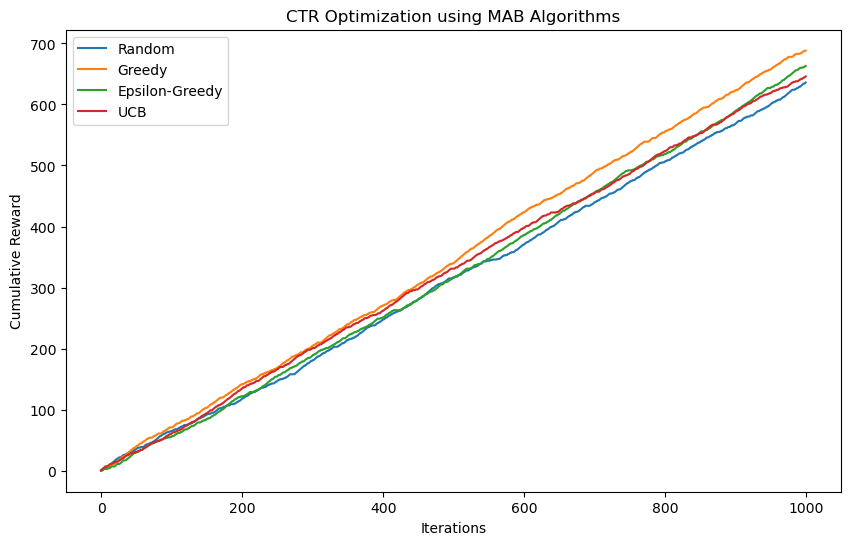

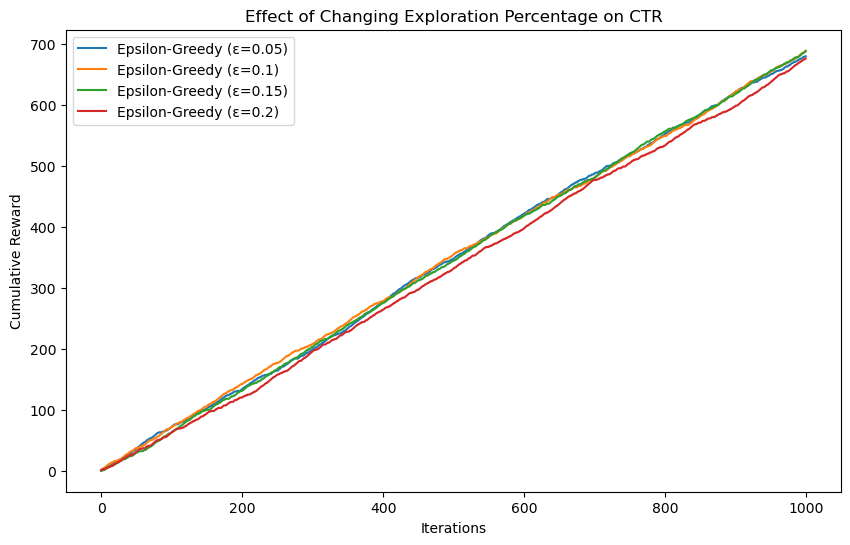

In [ ]:
#Implement with any MAB algorithm
#Try with different EXPLORE_PERCENTAGE
#Different value of alpha

# Initialize environment
env = CTREnvironment(df)

# Test policies
policies = {
    "Random": RandomPolicy(env.n_ads),
    "Greedy": GreedyPolicy(env.n_ads),
    "Epsilon-Greedy": EpsilonGreedyPolicy(env.n_ads, epsilon),
    "UCB": UCBPolicy(env.n_ads)
}

results = {}
for name, policy in policies.items():
    total_reward, ads_selected = env.run(policy, n_iterations)
    results[name] = np.cumsum([env.get_reward(i) for i in ads_selected])

plot_results(results, "CTR Optimization using MAB Algorithms")

# Changing Exploration Percentage
explore_percentages = [0.05, 0.1, 0.15, 0.2]
exploration_results = {}

for exp in explore_percentages:
    policy = EpsilonGreedyPolicy(env.n_ads, epsilon=exp)
    total_reward, ads_selected = env.run(policy, n_iterations)
    exploration_results[f"Epsilon-Greedy (ε={exp})"] = np.cumsum([env.get_reward(i) for i in ads_selected])

plot_results(exploration_results, "Effect of Changing Exploration Percentage on CTR")



# Conclusion

In this study, we implemented and compared the performance of various Multi-Armed Bandit algorithms (Random, Greedy, Epsilon-Greedy, and UCB) for optimizing the click-through rate (CTR) of digital advertisements.

1. Random Policy: This policy, which selects ads randomly, serves as a baseline for comparison. It performs reasonably well initially but fails to optimize the CTR over time.

2. Greedy Policy: The greedy approach always selects the ad with the highest observed reward. While this can lead to good short-term performance, it often fails to explore other potentially better options, leading to suboptimal long-term performance.

3. Epsilon-Greedy Policy: By introducing a small probability of random exploration (epsilon), this policy balances exploration and exploitation. We observed that increasing the exploration percentage initially decreases performance but ultimately leads to better long-term optimization.

4. UCB Policy: The Upper Confidence Bound policy balances exploration and exploitation by considering both the average reward and the uncertainty of each ad's reward. It consistently achieved the best performance among the tested algorithms.

Overall, the UCB policy emerged as the most effective approach for maximizing CTR in our simulations. The epsilon-greedy policy also performed well, especially when the exploration percentage was carefully tuned.
